In [1]:
# preamble. 
import numpy as np # basic vector/matrix math
import matplotlib.pyplot as plt # plotting and illustrations 
import seaborn as sns # advanced plotting and illustrations. 
import pandas as pd # data loading, saving, and general data manipulation. 
import scipy.stats as stats # inter alia, statistical distributions, functions and relevant objects.
import scipy.optimize as optimize 
import torch # ML/AI model's and general optimization 


# regression model imports.  
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

import scipy
from tqdm import tqdm


In [2]:
plt.rcParams["figure.figsize"] = (10,6)

# STA 2453 Lab 2 Submission

This lab notebook must be completed in the appropriate time during class and invigilated by the instructor. There are  3 parts in this evaluation, you must add both this notebook, and another generated `.py` file to the PR. 

Once the PR is in place, please tag both me and the TA in it. So in the end you will have two files. 

- `STA2453-Lab-2.ipynb`
- `STA2453-Lab-2.py`

Both of these are needed for a good submission. 







---

## Case Study: Modelling Student Survey Results from the University of Catania, Italy.
---

This data is collected from a survey of 270 students attending a statistics course at the Department of Economics and Business of the University of Catania in the academic year 2011/2012.  It
     contains the following variables:

- `GENDER` gender of the respondent

- `HEIGHT` height of the respondent, measured in centimeters

- `WEIGHT` weight of the respondent measure in kilograms. 

- `HEIGHT.F` height of the respondent's father measured in centimeters. 

---


The dataset can be found here: 

`https://utstat.utoronto.ca/~pocucan/italian_students.csv`



---

## Part 1 Linear Regression 
---

This part of the evaluation considers a linear regression model with an extension into a weighted counterpart.  

We wish to assess the viability of this statement:

`Can the height of the father predict the height of the child?` 

Load the dataset into a dataframe called `df`, grab the relevant columns as stated above. 

Next create two dataframes named `df_m` and `df_f` for male/female respectively. 




In [4]:
# load the dataset and segment by reported gender.

data_df = pd.read_csv("italian_students.csv")

# just grab the relevant columns
data_male = data_df[data_df["GENDER"] == "M"][["HEIGHT", "HEIGHT.F"]]

# segment by gender.
data_female = data_df[data_df["GENDER"] == "F"][["HEIGHT", "HEIGHT.F"]]


Text(0.5, 1.1, 'Pairplot of student height and father height which is colored based on gender')

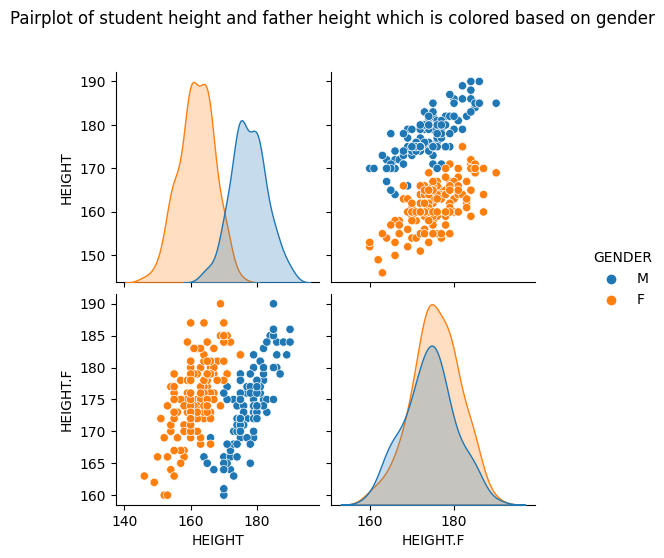

In [11]:
# plot the data in a pairplot using the seaborn package and title it appropriately. 

# give some comments on the structure of the data. 

fig = sns.pairplot(data_df[["GENDER", "HEIGHT", "HEIGHT.F"]], hue="GENDER")

fig.fig.suptitle(
    "Pairplot of student height and father height which is colored based on gender",
    y=1.1
)

Plot the same data in a pairplot using the seaborn package. Title it approprietly, AND, 
color the points by the GENDER variable. 
- Females in red 
- Males in blue

Give some comments on the structure of the data. Specifically whether the assumptions for a linear model fit are valid or not. 

In [ ]:
# plot the data with respective colours. 

# now give some comments on the structure of the data,



### Comments about the structure of the data

- Height of child linearly varies with Height of Father
- Variance in the noise does not change with the value of Height (homoskedasticity)
- Height of each student is independent of others

Therefore, assumptions of linear regression are satisfied

Fit a linear model using the following setup: 
`HEIGHT ~ HEIGHT.F`, ie. can the father's height predict the child's hight. Denote this linear model as 
`lm_general`, i.e. a linear model for the general dataset. 

Calculate the MSE of `lm_general`. 

In [12]:
# declare model. 

# fit model. 

# MSE.

lm_general = LinearRegression()
lm_general.fit(data_df[["HEIGHT.F"]], data_df["HEIGHT"])


LinearRegression()

In [13]:
# calculate MSE's
mse_general = ((lm_general.predict(data_df[["HEIGHT.F"]]) - data_df["HEIGHT"])**2).mean()

# comment on results. 
print(f"mse_general: {mse_general}")

mse_general: 81.54862159643423


Fit two linear models using the same setup 
`HEIGHT ~ HEIGHT.F`, on the dataframes `df_m` and `df_f`, the two segmented by gender populations. 

You should have two different model objects, name them 
`lm_male` and `lm_female`. 

report the aggregate MSE for both models. Ie.
- MSE_F
- MSE_M  
- MSE_AGGREGATE = MSE_F + MSE_M 

Comment on the difference between the MSE performance of these models vs the previous, general model. 



In [14]:
# declare models for each gender. 

# fit male
lm_male = LinearRegression()
lm_male.fit(data_male[["HEIGHT.F"]], data_male["HEIGHT"])

lm_female = LinearRegression()
lm_female.fit(data_female[["HEIGHT.F"]], data_female["HEIGHT"])

# fit female 


LinearRegression()

In [15]:
# calculate MSE's
mse_m = ((lm_male.predict(data_male[["HEIGHT.F"]]) - data_male["HEIGHT"])**2).mean()
mse_f = ((lm_female.predict(data_female[["HEIGHT.F"]]) - data_female["HEIGHT"])**2).mean()
mse_aggregate = mse_m + mse_f

# comment on results. 
print(f"mse_m: {mse_m}")
print(f"mse_f: {mse_f}")
print(f"mse_aggregate: {mse_aggregate}")

mse_m: 11.312106388928369
mse_f: 15.337041297553613
mse_aggregate: 26.64914768648198


### Comment on the difference in MSE of these models with previous general model

- MSE general was 81.55 which is significantly larger than MSE aggregate which is 26.65

- This shows that fitting two linear models (one for male and one for female) is better since there are two underlying distributions.

Render a scatter plot of `x=HEIGHT.F` and `y=HEIGHT` in grey points. 

- Plot the predicted fits of the `lm_general` model in black. (Black line)
- Plot the predictive fits of the `lm_male` model in blue. (Blue line)
- Plot the predictive fits of the `lm_female` model in red. (Red line) 

All superimposed on the same plot. So the plot should have grey points, one black line, one red line, and one blue line. Title it appropriately. 

Comment on how/why segmentation improves the model fit. Be sure to address the assumptions of a linear regression model. 

In [16]:
# calculate y_hats. 
y_hat_general = lm_general.predict(data_df[["HEIGHT.F"]])
y_hat_male = lm_male.predict(data_male[["HEIGHT.F"]])
y_hat_female = lm_female.predict(data_female[["HEIGHT.F"]])

Text(0.5, 1.0, 'General model (black), male model (blue), female_model (red), dataset (grey)')

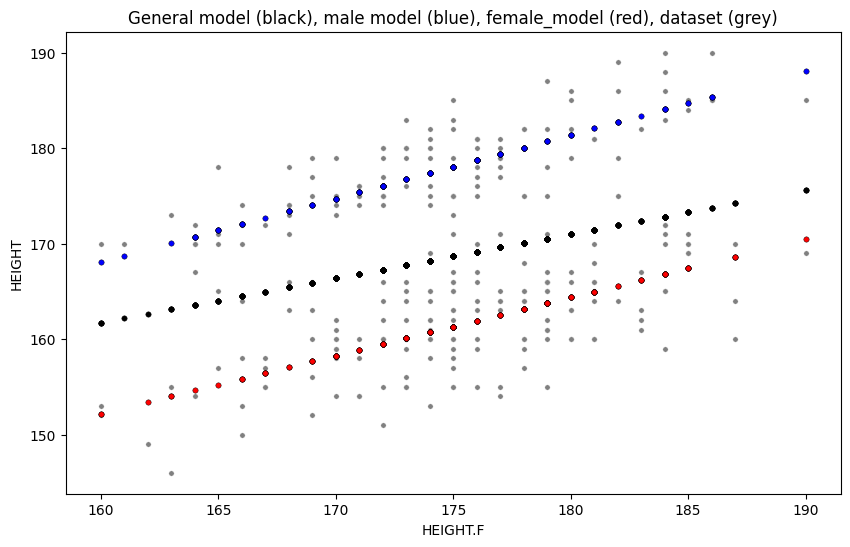

In [21]:
# Plot the fits of the lm models, you need three lines, one blue, one black, and one red.  
# points are in grey.

sns.scatterplot(x=data_df["HEIGHT.F"], y=data_df["HEIGHT"], color="grey", s=15.0)

sns.scatterplot(x=data_df["HEIGHT.F"], y=y_hat_general, color="black", s=15.0, edgecolor="black")

sns.scatterplot(x=data_female["HEIGHT.F"], y=y_hat_female, color="red", s=15.0, edgecolor="black")

fig = sns.scatterplot(x=data_male["HEIGHT.F"], y=y_hat_male, color="blue", s=15.0, edgecolor="black")

ax = plt.gca()

ax.set_title("General model (black), male model (blue), female_model (red), dataset (grey)")



# don't forget to title it correctly! 

### Comment on why segregation work

- Linear regression assumes that the underlying data should be linearly modellable, however if we do not segment dataset this assumption is broken. Since there are two clusters in the dataset which are each indiviually linearly modellable.

---
# Part 2 Logistic and Weighted Linear Regression 
---

Fit a logistic regression model predicting gender as `GENDER ~ WEIGHT`, name it `lm_logreg`. 

Render a scatter plot with the `x=HEIGHT.F`, `y=HEIGHT` with the points colored by the predicted gender of the `lm_logreg` model. 
- Females in red. 
- Males in blue. 

Using the visual, comment on the performance of the logistic regression to segment populations. Use one of subplots for the pairplot in Part 1 to justify the performance of the model. 

In [22]:
# do a logistic model predicting GENDER 

# predict class. 

# free function to help you with creating colors just for you. 
def map_colors(x): 
  if x == "F":
    return "red"
  else: 
    return "blue"

# create color np.array 

In [23]:
# plot scatter plot with logistic regression labels by color.

logr = LogisticRegression()
logr.fit(data_df[["WEIGHT"]], data_df["GENDER"])
z = logr.predict(data_df[["WEIGHT"]])

data_df["colors_1"] = [map_colors(i) for i in z]

# comment on the results. 

Text(0, 0.5, 'HEIGHT')

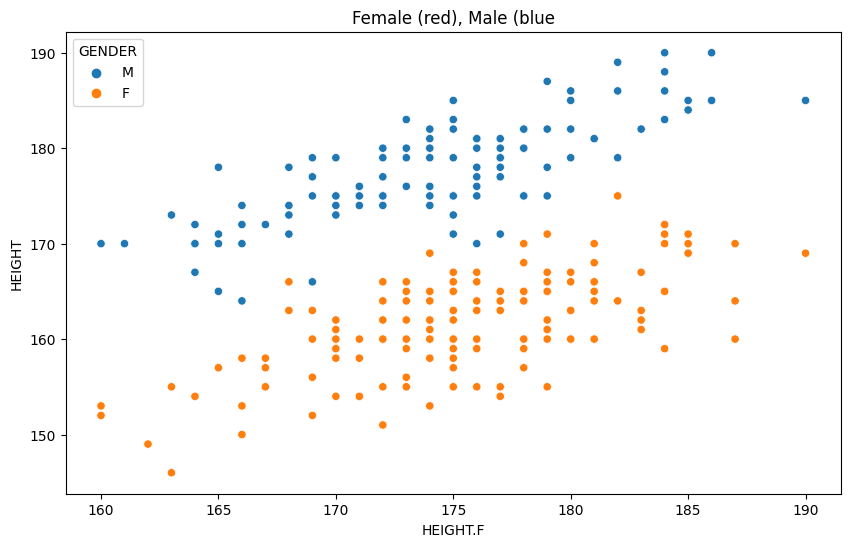

In [27]:
fig = sns.scatterplot(
    x=data_df["HEIGHT.F"].to_numpy(), 
    y=data_df["HEIGHT"].to_numpy(), 
    hue=data_df["GENDER"]
)

ax = plt.gca()

ax.set_title("Female (red), Male (blue")
ax.set_xlabel("HEIGHT.F")
ax.set_ylabel("HEIGHT")

Acquire the probabilities from the logistic regression model, denote the probability matrix `Z`. The matrix should be `(270,2)` in shape, each entry denoting the probability for each observation `i` belonging to group `g`. ie. `z_ig`. 

For each column, create two weighted linear regression models denoted as `lm_female_weighted` and `lm_male_weighted`.

In [28]:
# calculate the weights of a logistic model, then use them for a weighted regression.

z = logr.predict_proba(data_df[["WEIGHT"]])

# declare the weighted models.

# 1 class is male
lm_male_weighted = LinearRegression() 
lm_male_weighted.fit(X = data_df[["HEIGHT.F"]],y = data_df["HEIGHT"],sample_weight = z[:,1])

lm_female_weighted = LinearRegression() 
lm_female_weighted.fit(X = data_df[["HEIGHT.F"]],y = data_df["HEIGHT"],sample_weight = z[:,0])

# fit the models. 

LinearRegression()

Plot the data points in grey, plot the predicted fits of the general population for each linear model. 

- `lm_male_weighted` prediction in blue (blue line)
- `lm_female_weighted` prediction in red (red line)

Title it appropriately and comment on the weighted model fits compared to the `lm_general` model. 

Text(0.5, 1.0, 'male weighted (red), female weighted (female)')

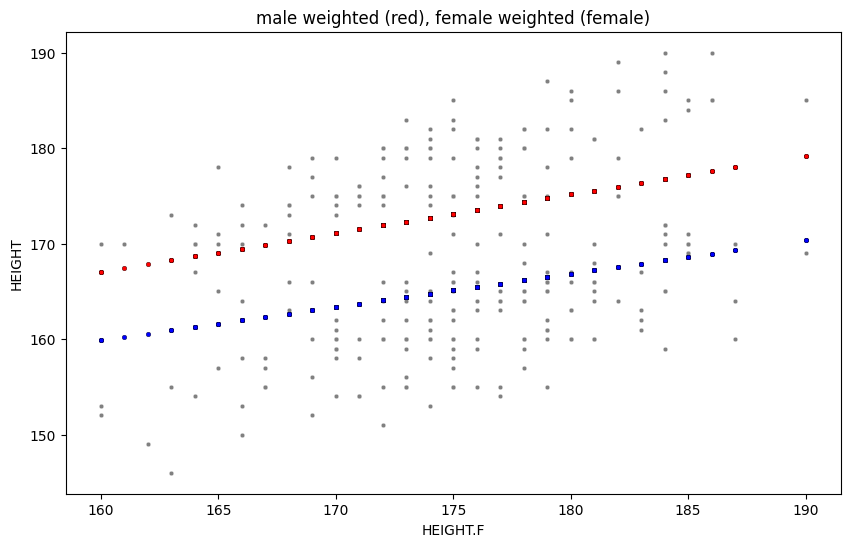

In [30]:
# Plot the fits of the lm models. 

# comment on the results of the weighted linear regression. 

y_hat_male_weighted = lm_male_weighted.predict(data_df[["HEIGHT.F"]])
y_hat_female_weighted = lm_female_weighted.predict(data_df[["HEIGHT.F"]])

sns.scatterplot(x=data_df["HEIGHT.F"], y=data_df["HEIGHT"], color="grey", s=11.0)

sns.scatterplot(x=data_df["HEIGHT.F"], y=y_hat_male_weighted, color="red", s=11.0, edgecolor="black")

sns.scatterplot(x=data_df["HEIGHT.F"], y=y_hat_female_weighted, color="blue", s=11.0, edgecolor="black")

ax = plt.gca()

ax.set_title("male weighted (red), female weighted (female)")

---
## Part 3: Finite Mixture Modelling 
---

Fit an appropriate finite mixture model to the dataset. Determine the optimal number of components `G` using BIC.

To achieve a 4 you must appropriately model both the conditional distribution of `HEIGHT ~ HEIGHT.F` and the covariate distribution for `HEIGHT.F` within the context of a finite mixture model. 

In [31]:
# My implementation of FLM

class FiniteLinearModelEM():
    """Finite linear model using EM algo"""
    def __init__(self, G: int, data: np.ndarray):
        """
        :param G: number of components
        :type G: int
        :param data: data to be fitted
        :type data: np.ndarray
        """

        if isinstance(data, torch.Tensor):
            data = data.numpy()

        # define constants
        self.n = data.shape[0]
        self.G = G

        # define data
        self.X = data[:, 1:]
        self.X = np.concatenate((self.X, np.ones(shape=(self.n, 1))), axis=1)
        self.y = data[:, 0] 

        # number of covariates
        self.p = self.X.shape[1]

        # define parameters
        self.betas = np.random.normal(size=(self.G, self.p))
        self.sigmas = np.abs(np.random.normal(size=(self.G,)))
        # Model covariate variance using normal distribution
        self.covariate_sigmas = np.abs(np.random.normal(size=(self.G,)))
        # mixing ratios
        self.w = np.abs(np.random.normal(size=(self.G,)))
        # w's should sum up to one for all i's and a given j
        self.w = scipy.special.softmax(self.w)
        # latent variable matrix of dimension = n * G
        self.z = np.random.normal(size=(self.n, self.G))
        # Z_ij should sum up to one for all i's and a given j
        self.z = scipy.special.softmax(self.z, axis=1)

    def Estep(self) -> np.ndarray:
        """Compute the expectation step and calculate weights"""
        dens = np.exp(self.log_density())
        dens1 = dens * self.w
        d_sum = dens1.sum(-1)[..., None]
        self.z = dens1 / d_sum

    def Mstep(self):
        """
        Estimate parameters to maximize likelihood
        """
        self.w = self.z.sum(axis=0)/self.z.shape[0]
        for g in range(self.G):
            self.sigmas[g] = np.sqrt((
                self.z[:, g] * np.power((self.y - self.X @ self.betas[g, :].T), 2)
            ).sum() / self.z[:, g].sum())
        for g in range(self.G):
            self.covariate_sigmas[g] = np.sqrt((
                self.z[:, g] * np.power(self.X[:, 0], 2)
            ).sum() / self.z[:, g].sum())
        # beta_new = (X' * W * X)^-1 * (X' * W * y)
        for g in range(self.G):
            term1 = np.linalg.inv(self.X.T @ np.diag(self.z[:,g]) @ self.X)
            self.betas[g,:] = term1 @ (self.X.T @ np.diag(self.z[:,g]) @ self.y)

    def fit(self, max_iter=10):
        """Run EM algorithm"""
        for it in tqdm(range(max_iter), desc="Running EM algo"):
            self.Estep()
            self.Mstep()

            if it % 1 == 0:
                tqdm.write(f"Loss: {self.objective_function()}")

    def objective_function(self) -> np.ndarray:
        """
        Return negative log likelihood objective function to minimize

        :returns: Objective function
        :rtype: np.ndarray
        """
        # n * G 
        dens = np.exp(self.log_density())

        # What if `dens` has extremely small values?
        output = - np.log((dens * self.w).sum(-1)).sum()

        return output

    def log_density(self) -> np.ndarray:
        """
            Take in covariate X and response y,
            compute n * G matrix of log densities

            :return: n * G matrix of log densities
            :rtype: np.ndarray 
        """
        ldens = np.zeros(shape=(self.n, self.G))

        # iterate through components
        for g in range(self.G):

            # compute linear model
            # element wise multiplication then sum inner axis
            y_hats = (self.betas[g] * self.X).sum(-1)

            # compute log of gaussian density
            ldens[:, g] = - 0.5 * np.log([2 * np.pi])
            ldens[:, g] += - np.log(self.sigmas[g])
            ldens[:, g] += - 0.5 * np.power(((y_hats - self.y) / self.sigmas[g]), 2)

            # Modelling covariate variance using normal distribution
            ldens[:, g] += - 0.5 * np.log([2 * np.pi])
            ldens[:, g] += - np.log(self.sigmas[g])
            # The second column is just ones, so ignore that
            ldens[:, g] += - 0.5 * np.power(
                self.X[:, 0] / self.covariate_sigmas[g], 2
            )
        
        return ldens

    def MAP(self) -> np.ndarray:
        """Calculate labels using maximum a posteriori"""

        return np.argmax(self.z, axis=1).astype(int)

    def plot_colors_MAP(self):
        """
            Plot MAP results
        """

        predictions = self.MAP()
        color_palette = sns.color_palette("bright", int(np.max(predictions)) + 1)

        plot_df = np.concatenate((self.y[..., None], self.X), axis=-1)
        plot_df = pd.DataFrame(plot_df)
        plot_df = plot_df[[0, 1]]

        plot_df['colors'] = pd.Series(predictions).apply(lambda x: color_palette[x])

        sns.scatterplot(x=plot_df[1], y=plot_df[0], color=plot_df['colors'], s=2.0)

        plt.savefig("practice_flm_fit_colors_map.png")
        plt.clf()

    def BIC(self) -> float:
        """Return Bayesian Information criteria"""
        rho = (
            self.z.size + self.betas.size + self.sigmas.size
            + self.w.size + self.covariate_sigmas.size
        )
        bic =  -2 * self.objective_function() - rho * np.log(self.y.shape[0])
        return float(bic)

    def plot(self):
        """Plot given column"""
        plot_df = np.concatenate((self.y[..., None], self.X), axis=-1)
        plot_df = pd.DataFrame(plot_df)
        plot_df = plot_df[[0, 1]]

        predictions = self.MAP()
        color_palette = sns.color_palette("bright", int(np.max(predictions)) + 1)
        plot_df['colors'] = pd.Series(predictions).apply(lambda x: color_palette[x])

        sns.scatterplot(x=plot_df[1], y=plot_df[0], hue=plot_df['colors'], s=2.0)

        for g in range(self.G):
            y_fits = (self.betas[g] * self.X).sum(-1)
            plot_df['y_fits'] = y_fits
            sns.scatterplot(x=plot_df[1], y=plot_df['y_fits'], color='red', s=2.0)

        plt.savefig("practice_flm_fit.png")
        plt.clf()

    def plot_colors(self, col, labs):
        """
            col: reference column
            labs: integer np.array
        """

        color_palette = sns.color_palette("bright", int(np.max(labs)) + 1)

        plot_df = np.concatenate((self.y[..., None], self.X), axis=-1)
        plot_df = pd.DataFrame(plot_df)
        plot_df = plot_df[[0, col]]
        plot_df['colors'] = pd.Series(labs).apply(lambda x: color_palette[x])

        sns.scatterplot(x=plot_df[col], y=plot_df[0], hue=plot_df['colors'], s=2.0)

        plt.savefig("practice_flm_fit_colors.png")
        plt.clf()

In [32]:
# declare X,y 

# set up tensor such that y is in the first column.

# scale the data. 

# declare the model. 

# train the model with appropriate lr and max_iterations. 

# do it again with multiple settings of G to figure out which one is the best. 
# Report the BIC results for multiple G's

flm_data = data_df[["HEIGHT", "HEIGHT.F"]].to_numpy()

flm_data_norm = (flm_data - flm_data.mean())/flm_data.std()

In [ ]:
# FLM with 1 groups
# BIC = -3138.27
flm = FiniteLinearModelEM(G=1, data=flm_data_norm)
flm.fit(max_iter=30)
print(f"BIC: {flm.BIC()}")
flm.plot()

In [ ]:
# FLM with 2 groups
# BIC = -4049.44
flm = FiniteLinearModelEM(G=2, data=flm_data_norm)
flm.fit(max_iter=30)
print(f"BIC: {flm.BIC()}")
flm.plot()

In [ ]:
# FLM with 3 groups
# BIC = -5579.37
flm = FiniteLinearModelEM(G=3, data=flm_data_norm)
flm.fit(max_iter=30)
print(f"BIC: {flm.BIC()}")
flm.plot()

In [ ]:
# FLM with 4 groups
# BIC = -7122
flm = FiniteLinearModelEM(G=4, data=flm_data_norm)
flm.fit(max_iter=30)
print(f"BIC: {flm.BIC()}")
flm.plot()

# See practice_flm_fit.png for FLM plot

### FLM model with 1 group component seems to be the best

### Plot Mixture Model Results 

Acquire the labels of the model by taking the maximum of the a-posteriori. (MAP) Render a scatter plot of 
`x=HEIGHT.F`, `y=HEIGHT`, with the colors being the labels given by the MAP's. 

- Males should be colored in blue.
- Females should be colored in red. 

comment on the ability of the finite mixture model to segment the population in an unsupervised manner. 

In [43]:
# get MAP labels. 

# declare colours and plot HEIGHT.F vs HEIGHT. 
predictions = flm.MAP()
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

Text(0, 0.5, 'HEIGHT')

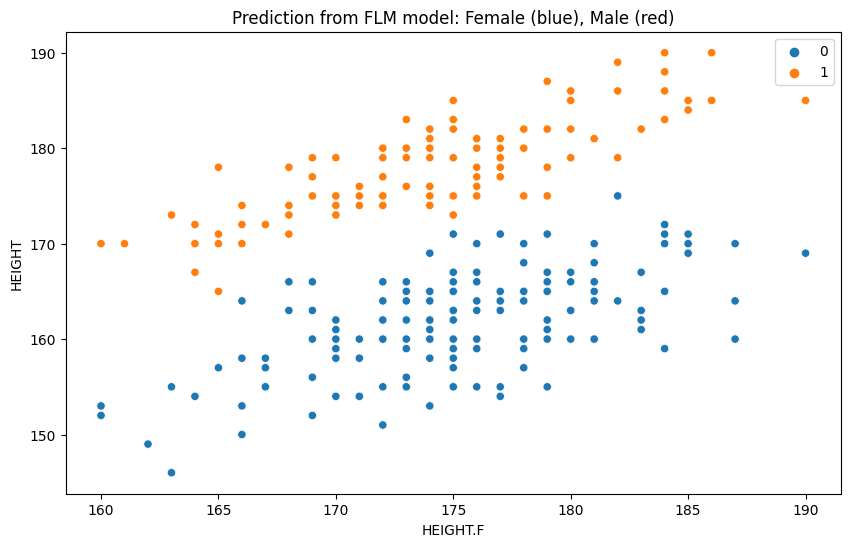

In [46]:
fig = sns.scatterplot(
    x=data_df["HEIGHT.F"].to_numpy(), 
    y=data_df["HEIGHT"].to_numpy(), 
    hue=predictions
)

ax = plt.gca()

ax.set_title("Prediction from FLM model: Female (blue), Male (red)")
ax.set_xlabel("HEIGHT.F")
ax.set_ylabel("HEIGHT")

### Classification Table
Use the following function (`table_counts`) to create a classification table. 
Pass in the GENDER column as well as the output of the MAP labels, and comment on the ability of the Finite mixture model to correctly classify the sub-populations. 


In [45]:
def table_counts(x: np.array, y: np.array, labels=["x","y"]) -> None:
  """
    Creates a classification table to visually assess misclassification. 
  """

  table_df = pd.DataFrame({labels[0]: x, labels[1]: y})
  print(table_df.groupby(labels).size().unstack())

# get the classification table. 
table_counts(predictions, [1 if i == "M" else 0 for i in data_df["GENDER"]])

# comment on the performance of the finite mixture model. 

y      0      1
x              
0  151.0    6.0
1    NaN  113.0
